## CNN - Example 3
This code is from "Python - All in One for Dummies"

This example uses Fashion_MNIST dataset and predicts a given image using CNNs.

In [1]:
# the Fashion_MNIST data set
# https://github.com/zalandoresearch/fashion-mnist 
# the images are 28x28 and grayscale
# there are 60,000 training images and 10,000 test images

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.examples.tutorials.mnist import input_data
from PIL import Image

In [4]:
# Import Fashion MNIST
# note that onehotencoding is performed
# if you do not have the correct path, it downloads regular MNIST and not fashion dataset ?
fashion_mnist = input_data.read_data_sets('../cnn_example3_data/fashion', one_hot=True)

fashion_mnist = tf.keras.datasets.fashion_mnist

# setup training and test datasets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../cnn_example3_data/fashion\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../cnn_example3_data/fashion\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../cnn_example3_data/fashion\t10k-images-idx3-ubyte.gz
Extracting ../cnn_example3_data/fashion\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
# let us see the dimensions of one of the images
train_images[0].shape

(28, 28)

In [6]:
# let us see the pixel values for one of the images
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
# the images are gray-scale. We will normalize the values to [0-1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [8]:
# prepare the training images, adding color dimension (1=grayscale)
train_images = train_images.reshape(train_images.shape[0],28,28,1)

# prepare the test images,adding color dimension (1=grayscale)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [9]:
train_images[0].shape

(28, 28, 1)

In [10]:
# set descriptive names to the ten classes within the Fashion_MNIST data.
class_names = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



In [11]:
# we do not need to convert test and training labels to one-hot-encoded form
# since we read the data in with the one_hot = True
# from keras.utils import to_categorical
# train_labels_cat = to_categorical(train_labels)
# test_labels_cat = to_categorical(test_labels)

In [12]:
# set the CNN model
model = tf.keras.Sequential()

# they are 28x28 images
input_shape = (28,28,1)

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10, activation='softmax'))


# compile the model
# Sparse categorical crossentropy is a loss function used to measure the error between categories across the data set. 
# Categorical refers to the fact that the data has more than two categories (binary) in the data set. 
# Sparse refers to using a single integer to refer to classes (0–9, in our example). 
# Entropy (a measure of disorder) refers to the mix of data between the categories.
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
__________

In [14]:
# fit the model
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 299s 5ms/step - loss: 0.6046 - acc: 0.7863
Epoch 2/5
60000/60000 [==============================] - 300s 5ms/step - loss: 0.3811 - acc: 0.8639
Epoch 3/5
60000/60000 [==============================] - 309s 5ms/step - loss: 0.3445 - acc: 0.8790
Epoch 4/5
60000/60000 [==============================] - 319s 5ms/step - loss: 0.3115 - acc: 0.8910
Epoch 5/5
60000/60000 [==============================] - 318s 5ms/step - loss: 0.2968 - acc: 0.8956


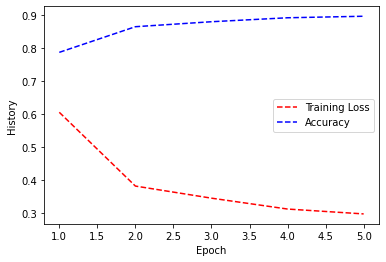

In [15]:
# Get training and test loss histories
training_loss = history.history['loss']
accuracy = history.history['acc']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(0)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, accuracy, 'b--')
plt.legend(['Training Loss', 'Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('History')
plt.show(block=False);
plt.pause(0.001)


In [16]:
# evaluate the model, test with 10,000 images to calculate the model score
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 20s 2ms/step


In [17]:
test_loss

0.26514259245991706

In [18]:
test_acc

0.905

In [19]:
from sklearn.metrics import classification_report
predictions = model.predict_classes(test_images)
print(classification_report(test_labels,predictions))

             precision    recall  f1-score   support

          0       0.88      0.84      0.86      1000
          1       0.99      0.98      0.99      1000
          2       0.82      0.91      0.86      1000
          3       0.88      0.93      0.91      1000
          4       0.88      0.77      0.82      1000
          5       0.99      0.96      0.97      1000
          6       0.72      0.74      0.73      1000
          7       0.93      0.98      0.96      1000
          8       0.98      0.97      0.98      1000
          9       0.98      0.96      0.97      1000

avg / total       0.91      0.91      0.90     10000



In [20]:
# now we will test the model using a single test image from Fashion_MNIST dataset
# get a test image from Fashion_MNIST data
img = test_images[15]

In [21]:
# recall that the pixel values for this test image were already scaled [0-1]

In [22]:
img.shape

(28, 28, 1)

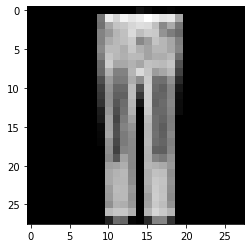

In [23]:
plt.figure(1)
# to display using imshow() we will create a temp copy with dimensions of (28x28)
plt.imshow(img.reshape(28,28), cmap='gray')
plt.show(block=False)

In [24]:
# the predict() method expects the image in 4 dimensions. The 4th dimension is a batch.
# So we have one batch that consists of one image here. 
img = (np.expand_dims(img,0))

In [25]:
img.shape

(1, 28, 28, 1)

In [26]:
singlePrediction = model.predict(img,steps=1)
print ("Prediction Output")
print(singlePrediction)
print()

Prediction Output
[[4.8053066e-06 9.9994457e-01 2.7748749e-06 3.5689052e-05 5.3130530e-06
  2.1097527e-07 5.2220093e-06 3.1524866e-07 8.8093259e-07 2.5085541e-07]]



In [27]:
# the prediction returns different probabilities for each class in class_names[]
# the largest probability is the prediction of the model.

In [28]:
# get the index (element) with the hightest probability
NumberElement = singlePrediction.argmax()
# get the probability value itself
Element = np.amax(singlePrediction)

print ("Our Network has concluded that the image number '15' is a " +class_names[NumberElement])
print (str(int(Element*100)) + "% Confidence Level")
print('Test accuracy', test_acc)

Our Network has concluded that the image number '15' is a Trouser
99% Confidence Level
Test accuracy 0.905


In [29]:
# now we will use an external image to test the model
# read test image and force it to 28x28 resolution

imageName = "cnn_example3_data/tshirt_white.jpg"
from keras.preprocessing import image
testImg = image.load_img(imageName, target_size=(28, 28),color_mode="grayscale")

Using TensorFlow backend.


In [30]:
type(testImg)

PIL.Image.Image

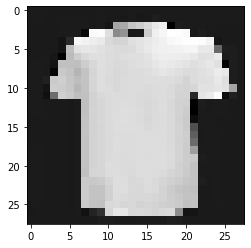

In [31]:
# display the image
plt.imshow(testImg, cmap='gray')
plt.show(block=False)

In [32]:
# convert to array
testImg = image.img_to_array(testImg)

In [33]:
type(testImg)

numpy.ndarray

In [34]:
testImg.shape

(28, 28, 1)

In [35]:
# scale the pixel values to [0-1] excluding color dimension
testImg[0] = testImg[0]/255
testImg[1] = testImg[1]/255

In [36]:
# the predict() method expects the image in 4 dimensions. The 4th dimension is a batch.
# So we have one batch that consists of one image here. 
testImg = (np.expand_dims(testImg,axis = 0))

In [37]:
testImg.shape

(1, 28, 28, 1)

In [38]:
singlePrediction = model.predict(testImg,steps=1)

In [39]:
print ("Prediction Output")
print(singlePrediction)
print()

NumberElement = singlePrediction.argmax()
Element = np.amax(singlePrediction)
print ("Our Network has concluded that the file '" +imageName+"' is a "+class_names[NumberElement])
print (str(int(Element*100)) + "% Confidence Level")
plt.show()

Prediction Output
[[9.7264037e-09 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9999988e-01
  0.0000000e+00 1.3182013e-07 0.0000000e+00 1.9040594e-10 0.0000000e+00]]

Our Network has concluded that the file 'cnn_example3_data/tshirt_white.jpg' is a Coat
99% Confidence Level
